# YOLOv5 라벨 검증

혹시 좌표가 틀리지 않았는지 확인합니다.


In [1]:
import random
from pathlib import Path
from pprint import pprint
from typing import (
    Iterable,
    Optional,
    Sequence,
    Tuple,
    Union,
)

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# from preproc import odlabel
from preproc.odlabel import Box, Label

random.seed()
%matplotlib inline


In [2]:
def parse_line(text: str) -> Tuple[int, float, float, float, float]:
    words = text.rstrip().split(' ')
    return (int(words[0]), *map(float, words[1:]))

In [3]:
def list_labels(src: Path) -> Sequence[Label]:
    labels = []
    for path in src.rglob('*.txt'):
        with path.open(encoding='utf-8') as txt_in:
            label = Label(
                path.relative_to(src),
                (Box.from_centerbox(*parse_line(line)) for line in txt_in)
            )
            labels.append(label)

    return labels

In [4]:
val_labels = list_labels(Path('./dataset/validation-labels'))
len(val_labels)


76377

In [5]:
pprint(val_labels[:10])


[Label(의류/외투/18_X002_C331_1202/18_X002_C331_1202_1.txt),
 Label(의류/외투/18_X002_C331_1202/18_X002_C331_1202_4.txt),
 Label(의류/외투/18_X002_C331_1202/18_X002_C331_1202_3.txt),
 Label(의류/외투/18_X002_C331_1202/18_X002_C331_1202_2.txt),
 Label(의류/외투/18_X002_C331_1202/18_X002_C331_1202_0.txt),
 Label(의류/외투/18_X321_C900_1209/18_X321_C900_1209_3.txt),
 Label(의류/외투/18_X321_C900_1209/18_X321_C900_1209_0.txt),
 Label(의류/외투/18_X321_C900_1209/18_X321_C900_1209_4.txt),
 Label(의류/외투/18_X321_C900_1209/18_X321_C900_1209_2.txt),
 Label(의류/외투/18_X321_C900_1209/18_X321_C900_1209_1.txt)]


## 이미지 무작위로 보여주기


In [6]:
def image_with_box(path: Path, boxes: Iterable[Box]) -> Image.Image:
    image = Image.open(path)
    drawer = ImageDraw.Draw(image)
    colors = {0: (0, 255, 255), 1: (255, 0, 255), 2: (255, 255, 0)}
    for i, box in enumerate(boxes):
        if i in colors:
            color = colors[i]
        else:
            color = tuple(random.randint(0, 255) for _ in range(3))
        # print(box)
        drawer.rectangle(box.rect.tuple(image.size), outline=color, width=5)

    # debug
    # ImageShow.show(image)

    return image

In [7]:
def show_images(src: Path, population: Sequence[Label], classid: int = -1):
    fig, ax = plt.subplots(3, 3, figsize=(12, 12))
    labels = random.sample(population, 9)

    for i, label in enumerate(labels):
        image = image_with_box(
            src / label.path.with_suffix('.jpg'),
            label.boxes,
        )
        ax[i%3][i//3].imshow(image)

    fig.show()

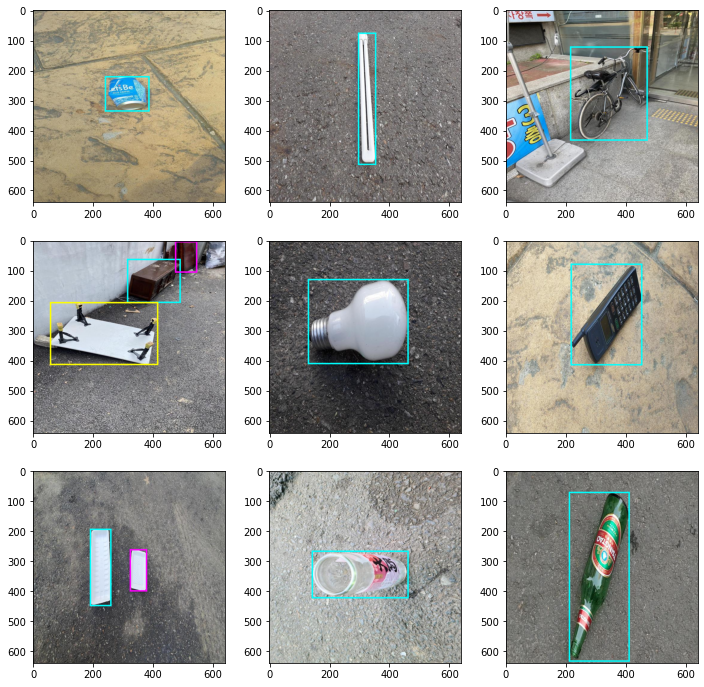

In [8]:
show_images(Path('./dataset/validation/'), val_labels)